## Biomassestatistikk etter produksjonsområde

Data hentet fra [Fiskeridirektoratet](https://www.fiskeridir.no/Akvakultur/Tall-og-analyse/Biomassestatistikk/Biomassestatistikk-etter-produksjonsomraade)

### Importing data

In [14]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from helpers.dicts import traffic_light

In [58]:
with open("input/biomasse.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data["Data"])

### Clean data

* Standardization: Round "BIOMASSE_KG" to integer
* Merge: "TRAFFIC_LIGHTS" based on helpers/dicts.py
* Sum "UTSETTSÅR"
* Remove 2024

In [54]:
df['BIOMASSE_KG'] = df['BIOMASSE_KG'].round().astype(int)
df['TRAFFIC_LIGHT'] = df['PO_KODE'].map(lambda x: traffic_light.get(x, {}).get('light'))
clean_df = df.groupby(["ÅR", "MÅNED_KODE", "PO_KODE", "PO_NAVN", "ARTSID", "TRAFFIC_LIGHT"]).agg({"BEHFISK_STK": "sum", "BIOMASSE_KG": "sum"}).reset_index()
clean_df = clean_df[clean_df["ÅR"] != 2024]

### Plot data

In [62]:
def monthly_laks(df, color):
    color_df = df[df["TRAFFIC_LIGHT"] == color]
    laks_df = color_df[color_df['ARTSID'] == "LAKS"]
    pivot_df = laks_df.pivot_table(index=['ÅR', 'MÅNED_KODE'], columns='PO_NAVN', values='BIOMASSE_KG')
    pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title(f'Monthly change in biomass in {color} locations')
    plt.xlabel('Month')
    plt.ylabel('Biomass in kg')
    plt.grid(True)
    plt.legend(title='Sted', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def monthly_regnbue(df, color):
    color_df = df[df["TRAFFIC_LIGHT"] == color]
    laks_df = color_df[color_df['ARTSID'] == "REGNBUEØRRET"]
    pivot_df = laks_df.pivot_table(index=['ÅR', 'MÅNED_KODE'], columns='PO_NAVN', values='BIOMASSE_KG')
    pivot_df.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title(f'Monthly change in biomass in {color} locations')
    plt.xlabel('Month')
    plt.ylabel('Biomass in kg')
    plt.grid(True)
    plt.legend(title='Sted', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

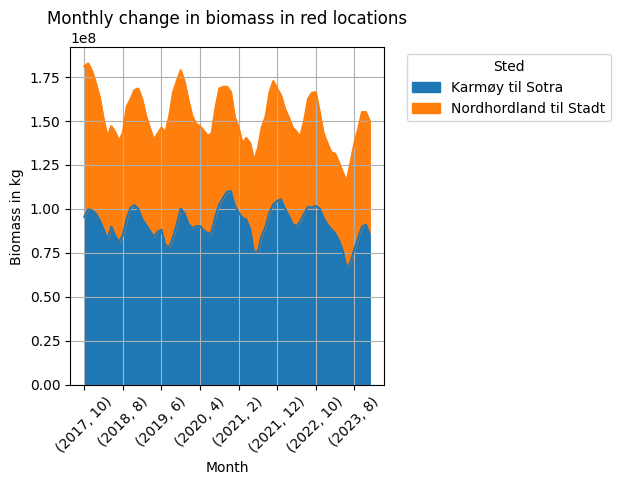

In [63]:
monthly_laks(clean_df, "red")

In [ ]:
monthly_regnbue(clean_df, "red")

### Questions

* What to do with null values on PO_KODE?